In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
#CamPos(0,0,20)
#CamBasx(1,0,0)
#CamBasz(0,0,-1)

#Implementation notes
#Projection best written always as vector operations like dot products (matrix products suffice)
#Take camera, put it far away and point it towards the origin, step by step, it's always to the origin, turn set of plot into movie like jhow the camera moves
#the camera should always have fixed limits for future purposes too (functional testing)
#a good test is make the world a figure made of straight lines (3D world), straight lines map to straight lines(?...most likely?)
#testing video (horizontal and rotational )
#field of view (math)
#0.199 0.799 -0.1
#7.53 -9.14 7.51

In [ ]:
#Input Data
n = 3

CamPos = list(float(num) for num in input("Enter the list items separated by space (Camera Position) ").strip().split())[:n]
CamPos = np.array(CamPos)
print(CamPos)

CamBasx = list(float(num) for num in input("Enter the list items separated by space (Camera X Basis)").strip().split())[:n]
CamBasx = np.array(CamBasx)
print(CamBasx)

CamBasy = list(float(num) for num in input("Enter the list items separated by space (Camera Y Basis)").strip().split())[:n]
CamBasy = np.array(CamBasy)
print(CamBasy)

CamBasz = list(float(num) for num in input("Enter the list items separated by space (Camera Z Basis)").strip().split())[:n]
CamBasz = np.array(CamBasz)
print(CamBasz)

Star = list(float(num) for num in input("Enter the list items separated by space (Star Position)").strip().split())[:n]
Star = np.array(Star)
print(Star)

Focal = float(input("Input Focal Length:"))
print(Focal)

Enter the list items separated by space (Camera Position) 0 0 20
[ 0.  0. 20.]
Enter the list items separated by space (Camera X Basis)1 0 0
[1. 0. 0.]
Enter the list items separated by space (Camera Y Basis)0 1 0
[0. 1. 0.]
Enter the list items separated by space (Camera Z Basis)0 0 1
[0. 0. 1.]
Enter the list items separated by space (Star Position)3
[3.]
Input Focal Length:3
3.0


In [ ]:
CamBasx = [(-CamBasz[1]/CamBasz[0])/np.sqrt(((CamBasz[1]/CamBasz[0])**2)+1),1/np.sqrt(((CamBasz[1]/CamBasz[0])**2)+1) ,0]
CamBasy = np.cross(CamBasx, CamBasz)
Focal = 2
CamBasz[1]

<ipython-input-3-61ee3454f922>:1: RuntimeWarning: invalid value encountered in scalar divide
  CamBasx = [(-CamBasz[1]/CamBasz[0])/np.sqrt(((CamBasz[1]/CamBasz[0])**2)+1),1/np.sqrt(((CamBasz[1]/CamBasz[0])**2)+1) ,0]


0.0

In [ ]:
0#Finding Rotational Matrix
R1 = np.append(CamBasx,[0])
R2 = np.append(CamBasy,[0])
R3 = np.append(CamBasz,[0])
R4 = np.array([0,0,0,1])
InvR = np.array([R1,R2,R3,R4])
InvR = InvR.transpose()
R = np.linalg.inv(InvR) #Rotational Matrix
print(R)

[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]


In [ ]:
#Finding Camera Position Vector
#CamVec = R@(np.append((Star - CamPos),[1]).transpose())
#CamVec = CamVec[0 : 3]
#print(CamVec)
#\-CamPos[0]

In [ ]:
#C = np.array(np.array([1,0,0,CamVec[0]]),np.array([0,1,0,CamVec[1]]),np.array([0,0,1,CamVec[2]]),np.array([0,0,0,1]))
C1 = np.array([1,0,0,CamPos[0]])
C2 = np.array([0,1,0,CamPos[1]])
C3 = np.array([0,0,1,CamPos[2]])
C4 = np.array([0,0,0,1])
C = np.array([C1,C2,C3,C4])
C

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 20.],
       [ 0.,  0.,  0.,  1.]])

In [ ]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


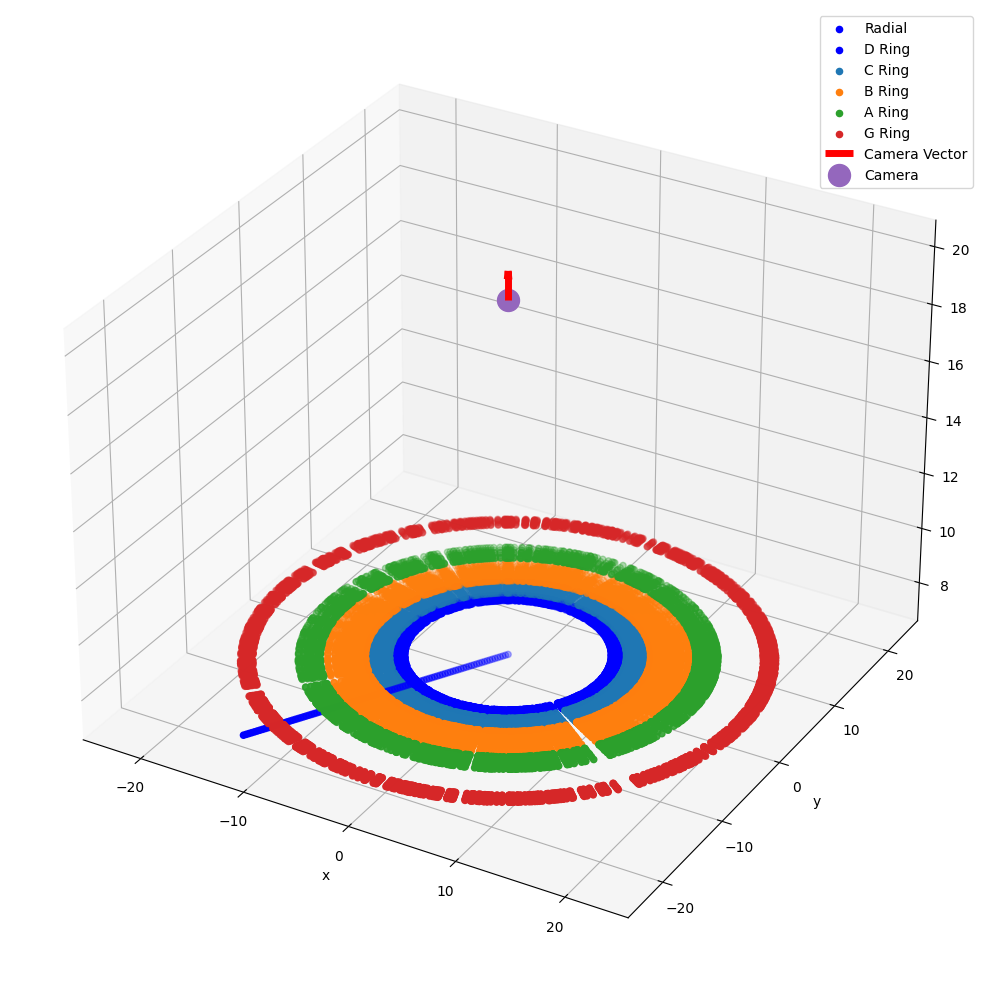

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [ ]:
from numpy.lib.arraysetops import union1d
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
u = np.random.uniform(low=0, high=13.3, size=(2500))
v = np.random.uniform(low=0, high=13.3, size=(2500))
u1 = np.random.uniform(low=0, high=13.3, size=(500))
v1 = np.random.uniform(low=0, high=13.3, size=(500))
plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
r = 7.5
#u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = r*np.cos(u) * np.sin(v)
y = r*np.sin(u) * np.sin(v)
z = r*np.cos(v) + 7.5

#D Ring
b= np.random.uniform(low=8.616, high=9.59, size=(10))
x2 = np.empty(b.size * np.cos(u1).size)
counter = 0
for i in b:
    for j in np.cos(u1):
        x2[counter] = i * j
        counter += 1

y2 = np.empty(b.size * np.sin(u1).size)
counter = 0
for i in b:
    for j in np.sin(u1):
        y2[counter] = i * j
        counter += 1
z2 = 7.5

#C Ring
a= np.random.uniform(low=9.615, high=11.849, size=(10))
x3 = np.empty(a.size * np.cos(u1).size)
counter = 0
for i in a:
    for j in np.cos(u1):
        x3[counter] = i * j
        counter += 1

y3 = np.empty(a.size * np.sin(u1).size)
counter = 0
for i in a:
    for j in np.sin(u1):
        y3[counter] = i * j
        counter += 1
z3 = 7.5

#B Ring
c= np.random.uniform(low=11.849, high=15.143, size=(20))
x4 = np.empty(c.size * np.cos(u1).size)
counter = 0
for i in c:
    for j in np.cos(u1):
        x4[counter] = i * j
        counter += 1

y4 = np.empty(c.size * np.sin(u1).size)
counter = 0
for i in c:
    for j in np.sin(u1):
        y4[counter] = i * j
        counter += 1
z4 = 7.5



#A Ring
d= np.random.uniform(low=15.734, high=17.615, size=(10))
x5 = np.empty(d.size * np.cos(u1).size)
counter = 0
for i in d:
    for j in np.cos(u1):
        x5[counter] = i * j
        counter += 1

y5 = np.empty(d.size * np.sin(u1).size)
counter = 0
for i in d:
    for j in np.sin(u1):
        y5[counter] = i * j
        counter += 1
z5 = 7.5

#G Ring
e= np.random.uniform(low=21.379, high=22.539, size=(10))
x6 = np.empty(e.size * np.cos(u1).size)
counter = 0
for i in e:
    for j in np.cos(u1):
        x6[counter] = i * j
        counter += 1

y6 = np.empty(e.size * np.sin(u1).size)
counter = 0
for i in e:
    for j in np.sin(u1):
        y6[counter] = i * j
        counter += 1
z6 = 7.5

#E Ring
f= np.random.uniform(low=23.183, high=61.818, size=(40))
x7 = np.empty(f.size * np.cos(u1).size)
counter = 0
for i in f:
    for j in np.cos(u1):
        x7[counter] = i * j
        counter += 1

y7 = np.empty(f.size * np.sin(u1).size)
counter = 0
for i in f:
    for j in np.sin(u1):
        y7[counter] = i * j
        counter += 1
z7 = 7.5
#ax.scatter3D(x, y, z, zorder=9)
a= np.linspace(0,25,100)
ax.scatter3D(a*np.cos(8*np.pi/6), a*np.sin(8*np.pi/6), 7.5, c ="b", label ="Radial")
ax.scatter3D(x2, y2, z2, c ="b", label ="D Ring")
ax.scatter3D(x3, y3, z3, label = "C Ring")
ax.scatter3D(x4, y4, z4, label = "B Ring")
ax.scatter3D(x5, y5, z5, label = "A Ring")
ax.scatter3D(x6, y6, z6, label = "G Ring")
ax.quiver(CamPos[0], CamPos[1], CamPos[2], CamBasz[0], CamBasz[1], 1*CamBasz[2], linewidths = 5, label ="Camera Vector", color = "red")
ax.scatter(CamPos[0], CamPos[1], CamPos[2], 'r', s =250, label = "Camera") #Camera Position
#ax.scatter3D(x7, y7, z7,  c= "b", label = "E Ring")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
Star = R@C@np.array([a*np.cos(8*np.pi/6), a*np.sin(8*np.pi/6), 7.5, 1])
Star1 = R@C@np.array([x,y,z, 1])
Star2 = R@C@np.array([x2,y2,z2, 1])
Star3 = R@C@np.array([x3,y3,z3, 1])
Star4 = R@C@np.array([x4,y4,z4, 1])
Star5 = R@C@np.array([x5,y5,z5, 1])
Star6 = R@C@np.array([x6,y6,z6, 1])



In [ ]:
CamPos

array([ 0.,  0., 20.])

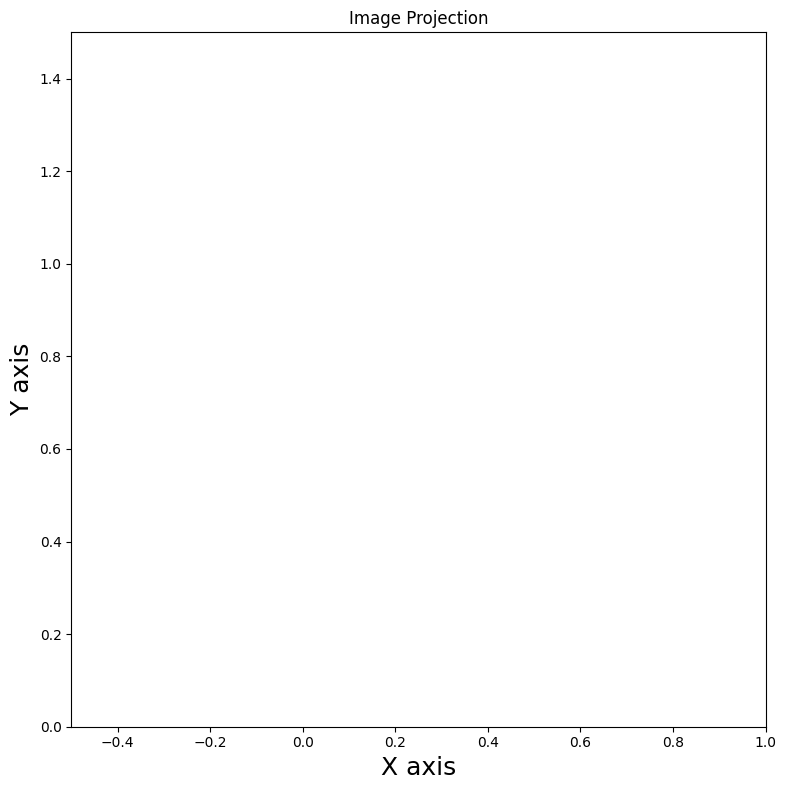

In [ ]:
#Plotting Camera Position
XPos1 = Focal * Star1[0]/Star1[2]
YPos1 = Focal * Star1[1]/Star1[2]
XPos = Focal * Star[0]/Star[2]
YPos = Focal * Star[1]/Star[2]
XPos2 = Focal * Star2[0]/Star2[2]
YPos2 = Focal * Star2[1]/Star2[2]
XPos3 = Focal * Star3[0]/Star3[2]
YPos3 = Focal * Star3[1]/Star3[2]
XPos4 = Focal * Star4[0]/Star4[2]
YPos4 = Focal * Star4[1]/Star4[2]
XPos5 = Focal * Star5[0]/Star5[2]
YPos5 = Focal * Star5[1]/Star5[2]
XPos6 = Focal * Star6[0]/Star6[2]
YPos6 = Focal * Star6[1]/Star6[2]
plt.figure(figsize = (8,8))
#plt.scatter(XPos1, YPos1, c ="b")
plt.xlim(-0.5,1.0)
plt.ylim(0,1.5)
plt.scatter(XPos2, YPos2)
plt.scatter(XPos, YPos)
plt.scatter(XPos3, YPos3)
plt.scatter(XPos4, YPos4)
plt.scatter(XPos5, YPos5)
plt.scatter(XPos6, YPos6)
plt.title("Image Projection")
plt.xlabel('X axis', fontsize = 18)
plt.ylabel('Y axis', fontsize = 18)
plt.gca().set_aspect('equal', adjustable = "box")
plt.show()

In [ ]:
#Plotting Camera Position
XPos1 = Focal * Star1[0]/Star1[2]
YPos1 = Focal * Star1[1]/Star1[2]
XPos = Focal * Star[0]/Star[2]
YPos = Focal * Star[1]/Star[2]
XPos2 = Focal * Star2[0]/Star2[2]
YPos2 = Focal * Star2[1]/Star2[2]
XPos3 = Focal * Star3[0]/Star3[2]
YPos3 = Focal * Star3[1]/Star3[2]
XPos4 = Focal * Star4[0]/Star4[2]
YPos4 = Focal * Star4[1]/Star4[2]
XPos5 = Focal * Star5[0]/Star5[2]
YPos5 = Focal * Star5[1]/Star5[2]
XPos6 = Focal * Star6[0]/Star6[2]
YPos6 = Focal * Star6[1]/Star6[2]
plt.figure(figsize = (8,8))
#plt.scatter(XPos1, YPos1, c ="b")
plt.xlim(-0.5,1.0)
plt.ylim(0,1.5)
plt.scatter(XPos2, YPos2)
plt.scatter(XPos, YPos)
plt.scatter(XPos3, YPos3)
plt.scatter(XPos4, YPos4)
plt.scatter(XPos5, YPos5)
plt.scatter(XPos6, YPos6)
plt.title("Image Projection")
plt.xlabel('X axis', fontsize = 18)
plt.ylabel('Y axis', fontsize = 18)
plt.gca().set_aspect('equal', adjustable = "box")
plt.show()

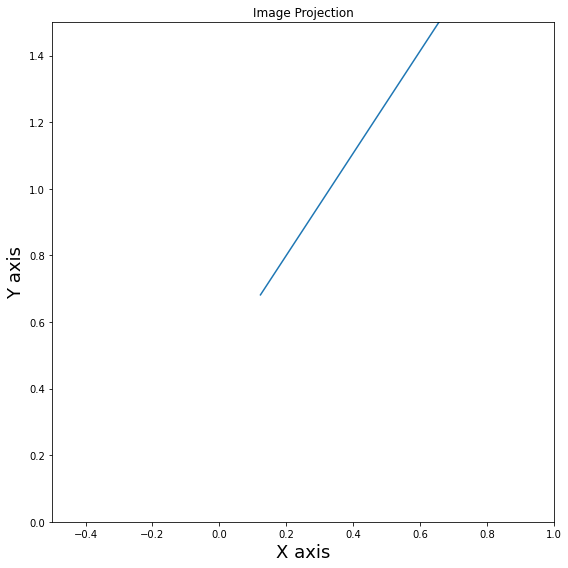

In [ ]:
plt.figure(figsize = (8,8))
plt.xlim(-0.5,1.0)
plt.ylim(0,1.5)

plt.plot(XPos, YPos)

plt.title("Image Projection")
plt.xlabel('X axis', fontsize = 18)
plt.ylabel('Y axis', fontsize = 18)
plt.show()

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
find_nearest(YPos, 1.5)
1- XPos[35]


0.33952249171501614

In [ ]:
import math
from scipy.stats import linregress
np.arctan((YPos[31]-YPos[32])/(XPos[31]-XPos[32]))

0.9931470720920128

In [ ]:
xi = np.array((XPos[0],YPos[0]))
xf = np.array((XPos[-1],YPos[-1]))
td  = np.sqrt(np.sum(np.square(xi - xf)))#Total Radius Projection Distance
ri = np.array((XPos[35],YPos[35]))
rf = np.array((XPos[-1],YPos[-1]))
pd = np.sqrt(np.sum(np.square(ri - rf))) #Relevant Radius Projection


0.9843442131862424

In [ ]:
#Normalized Range
Range = (td - pd)/td
Range

0.6688783698047018

In [ ]:
import random

Maj2 = [0,10, 14, 26, 14, 16, 16, 12, 8, 16]
Maj3 = [0,15, 21, 39, 21, 24, 24, 18, 12, 24]
Maj4 = [0,20, 28, 52, 28, 32, 32, 24, 16, 32]
#Min1 = [0, 6.875, 5,625, 17.875, 9.625, 11, 11, 8.25, 5.5, 11]
Min2 = [0,7.5, 10.5, 19.5, 10.5, 12, 12, 9, 6, 12]

N = random.randint(2,4)
M = random.randint(1,2)

print(N,M)

counter = 0
counter2 = 0
NewMin2 = [0, ]
while counter2 < 3:
    NewMin2 += str(random.uniform(0,Min2[counter2]))
    counter2 += 1

NewMin2

3 1


[0,
 '0',
 '.',
 '0',
 '0',
 '.',
 '9',
 '9',
 '4',
 '3',
 '7',
 '6',
 '8',
 '1',
 '7',
 '3',
 '1',
 '5',
 '9',
 '4',
 '4',
 '8',
 '3',
 '.',
 '9',
 '9',
 '1',
 '0',
 '0',
 '9',
 '2',
 '5',
 '2',
 '9',
 '9',
 '1',
 '7',
 '4',
 '2']